# Logistic Regression for Machine Learning

## Objective

Created a linear regression model using Python and Sklearn to predict if an applicant will be admitted to a US University. Techniques such as logistic regression, determination of the model's predictive power, computation of the ROC curve and interpretation of results were used to achieve this outcome.

## Data Set

The data set contains 644 University applicants, including Graduate Record Exam (GRE) score, Grade Point Average (GPA) and whether the applicant was/was not admitted.

Here are the following columns of the data set :

| Column | Description                                                                                          | Value                                                                                                                 |
|--------|------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| gre    | applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students. | Score ranges from 200 to 800.                                                                                         |
| gpa    | college grade point average.                                                                         | Continuous between 0.0 and 4.0.                                                                                       |
| admit  | binary value                                                                                         | Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected. |



## Reading In the Data

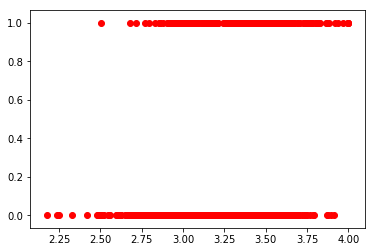

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

admissions = pd.read_csv("C:/Users/i7/csv/admissions.csv")
plt.scatter(admissions['gpa'], admissions['admit'], c='red')
plt.show()

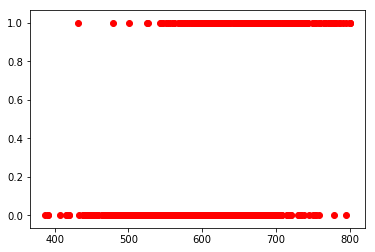

In [2]:
plt.scatter(admissions['gre'], admissions['admit'], c='red')
plt.show()

## Logit Function

Explore some of the logit function's properties to better understand why it's useful for classification tasks. Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. 

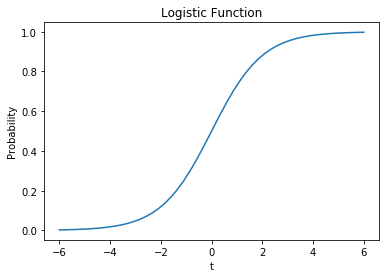

In [3]:
import numpy as np

# Logistic Function.
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828.
    return np.exp(x) / (1 + np.exp(x)) 

# Linspace is as numpy function to produced evenly spaced numbers over a specified interval.
# Create an array with 50 values between -6 and 6 as t.
t = np.linspace(-6,6,50, dtype=float)

# Get logistic fits.
ylogit = logit(t)

# Plot the logistic function.
plt.plot(t, ylogit, label="logistic")
plt.ylabel("Probability")
plt.xlabel("t")
plt.title("Logistic Function")
plt.show()
a = logit(-10)
b = logit(10)

## Training A Logistic Regression Model using Scikit-Learn

logistic_model.coef_: [[ 0.46390655  0.00744133]]


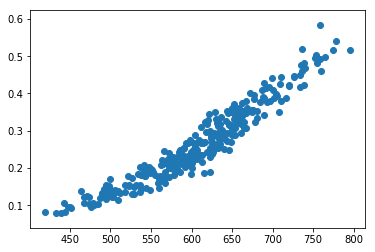

In [4]:
from sklearn.linear_model import LogisticRegression

# Randomly shuffle the data for the training and test set.
admissions = admissions.loc[np.random.permutation(admissions.index)]

# Train with 700 and test with the following 300, split dataset.
num_train = 700
data_train = admissions[:num_train]
data_test = admissions[num_train:]

# Fit Logistic regression to admit with gpa and gre as features using the training set.
logistic_model = LogisticRegression()
logistic_model.fit(data_train[['gpa', 'gre']], data_train['admit'])

# Print the Models Coefficients.
print("logistic_model.coef_:", logistic_model.coef_)

# Predict the chance of admission from those in the training set.
fitted_vals = logistic_model.predict_proba(data_train[['gpa', 'gre']])[:,1]
fitted_test = logistic_model.predict_proba(data_test[['gpa', 'gre']])[:,1]

plt.scatter(data_test["gre"], fitted_test)
plt.show()

Notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

In [6]:
print(fitted_test)

[ 0.09553305  0.18638045  0.32968594  0.21228385  0.36133773  0.34189585
  0.1303327   0.21860183  0.16999967  0.08002518  0.26082109  0.44763421
  0.25898392  0.1349298   0.1422989   0.23263828  0.30979299  0.36188964
  0.45943908  0.18192403  0.42563414  0.08182325  0.10559602  0.17923338
  0.30265479  0.49918494  0.24757267  0.37520161  0.1232498   0.24871438
  0.18347741  0.19035429  0.23994902  0.23006418  0.30862529  0.2424888
  0.3526734   0.54060054  0.15546779  0.26634379  0.16005262  0.48259211
  0.26936974  0.17917761  0.37710714  0.19903681  0.12256738  0.34964636
  0.28364174  0.34662817  0.4016208   0.2116311   0.21368688  0.25839812
  0.29430299  0.49129573  0.20226536  0.58286289  0.18562185  0.14378808
  0.10583039  0.27734855  0.46847192  0.2869995   0.35237636  0.38097138
  0.24196804  0.26398853  0.1797647   0.10578813  0.25260876  0.41928964
  0.39864036  0.15078841  0.37086847  0.1389975   0.32468058  0.36049367
  0.2935083   0.23402308  0.12728775  0.21361527  0.

In [7]:
print(fitted_vals)

[ 0.27976589  0.39745096  0.2601661   0.3043477   0.13378625  0.25569541
  0.47913177  0.28764737  0.24944577  0.22587177  0.1338471   0.27335151
  0.15680735  0.32824539  0.32570884  0.28217723  0.1503511   0.14959422
  0.07370456  0.20743469  0.5530941   0.14313188  0.3109759   0.12004277
  0.36662932  0.24150913  0.20229892  0.32890892  0.1537291   0.2454923
  0.32340647  0.34519666  0.2583226   0.24919663  0.27114227  0.22910791
  0.12756515  0.25717408  0.24355678  0.31509544  0.10619817  0.22185908
  0.34311591  0.22530343  0.16778777  0.30158809  0.21385556  0.17850795
  0.22347812  0.19921735  0.23338092  0.43604838  0.11985014  0.39584832
  0.18163482  0.1375944   0.45916088  0.24817626  0.21051705  0.08155476
  0.4768541   0.17566904  0.13066475  0.24745035  0.29551407  0.19875506
  0.19145354  0.34482302  0.09594419  0.40512443  0.29054614  0.11342984
  0.25443687  0.19405096  0.18604969  0.29683448  0.13512055  0.14101466
  0.41845564  0.15562206  0.46772175  0.13334305  0.

## Predictive Power

Say if the probability of admission is greater than 0.5 then the applicant was admitted. Then compute the accuracy of the model by comparing the admitted students versus predicted students.

In [8]:
# .predict() using a threshold of 0.50 by default.
predicted = logistic_model.predict(data_train[['gpa','gre']])

# The average of the binary array will give us the accuracy.
accuracy_train = (predicted == data_train['admit']).mean()
print("accuracy_train:", accuracy_train)

# Percentage of those admitted.
percent_admitted = data_test["admit"].mean() * 100
print("percent_admitted:", percent_admitted)

# Predicted to be admitted.
predicted = logistic_model.predict(data_test[['gpa','gre']])
print("predicted:\n", predicted)

# What proportion of our predictions were true.
accuracy_test = (predicted == data_test['admit']).mean()
print("accuracy_test:", accuracy_test)

accuracy_train: 0.778571428571
percent_admitted: 23.0
predicted:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

## Admissions ROC Curve

ROC is widely used to evaluate classification algorithms including logistic regression

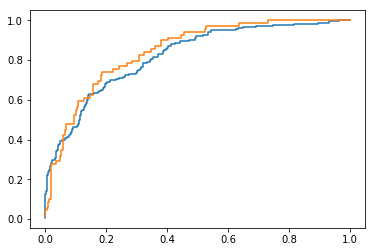

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the probabilities predicted by the training and test set.
# 'predict_proba' returns probabilies for each class.
train_probs = logistic_model.predict_proba(data_train[['gpa', 'gre']])[:,1]
test_probs = logistic_model.predict_proba(data_test[['gpa', 'gre']])[:,1]

# Compute auc for training set.
auc_train = roc_auc_score(data_train["admit"], train_probs)

# Compute auc for test set.
auc_test = roc_auc_score(data_test["admit"], test_probs)

# Difference in auc values.
auc_diff = auc_train - auc_test

# Compute ROC Curves.
roc_train = roc_curve(data_train["admit"], train_probs)
roc_test = roc_curve(data_test["admit"], test_probs)

# Plot false positives by true positives.
plt.plot(roc_train[0], roc_train[1])
plt.plot(roc_test[0], roc_test[1])

## Interpret the ROC Curve

See the ROC curve is reasonably steep in the beginning and slowly flattens out. The AUC for the test set is 0.79, just smaller than the training set AUC at 0.82. These are both indications that the model has learned to predict admission using just gpa and gre scores.

## Evaluating Binary Classifier

In [12]:
labels = logistic_model.predict(admissions[["gpa","gre"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0.0    974
1.0     26
Name: predicted_label, dtype: int64
     Unnamed: 0  admit       gpa         gre  predicted_label
420         420    0.0  3.012033  639.403420              0.0
264         264    1.0  2.858359  720.143826              0.0
226         226    1.0  3.567595  591.399738              0.0
690         690    0.0  2.236725  703.721833              0.0
791         791    0.0  2.525345  545.806183              0.0


### Accuracy

In [13]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)

     Unnamed: 0  admit       gpa         gre  predicted_label  actual_label
420         420    0.0  3.012033  639.403420              0.0           0.0
690         690    0.0  2.236725  703.721833              0.0           0.0
791         791    0.0  2.525345  545.806183              0.0           0.0
12           12    0.0  3.308623  604.405558              0.0           0.0
210         210    0.0  3.458794  573.097758              0.0           0.0
0.778


The accuracy doesn't tell how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help discriminate between the different types of outcomes a binary classification model can make. 

### Binary Classification Outcomes

Calculate the number of observations that fall into some of outcome categories.

In [14]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

24
754


### Few measures that are much more insightful than simple accuracy:

### Sensitivity

In [15]:
# From the previous screen
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])

sensitivity = true_positives / (true_positives + false_negatives)

print(sensitivity)

0.09836065573770492


Looks like the sensitivity of the model is around 9.8% and only about 1 in 10 students that should have been admitted were actually admitted.

### Specificity

In [17]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)


0.9973544973544973


It looks like the specificity of the model is 99.73%. This means that the model is really good at knowing which applicants to reject. Since around only 7% of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted.